In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Load data**

In [33]:
data = pd.read_csv('/kaggle/input/fer2013-csv/fer2013.csv')

data.shape

data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## **Test an image**

In [34]:
np_data = np.array(data)

np_data.shape

np_data[0]

array([0,
       '70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197

In [35]:
test_image = np_data[0][1].split(" ")
print(type(test_image))
print(len(test_image))

<class 'list'>
2304


In [36]:

test_image = np.array(test_image).reshape(48, 48)
test_image.shape

(48, 48)

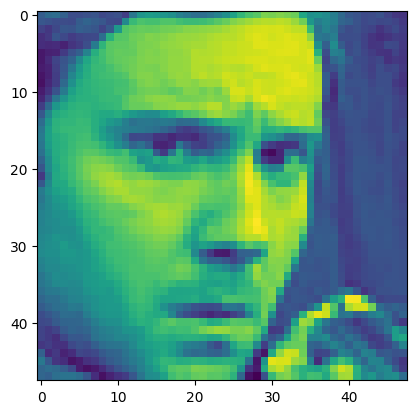

In [37]:
test_image = test_image.astype('float32')
test_image
plt.imshow(test_image)


In [38]:
type(test_image)

numpy.ndarray

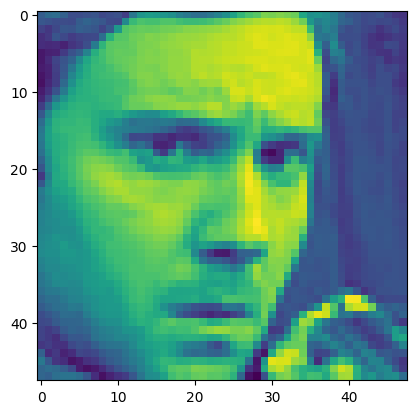

In [39]:
test_image = test_image.astype('uint8')
test_image
plt.imshow(test_image)

# **Data preprocessing**

In [40]:
import os
import imageio.v2 as imageio

for i in range(len(data)):
  directory = 'data/'+np_data[i][2]+'/'+str(np_data[i][0])
  if not os.path.exists(directory):
    os.makedirs(directory)
    
  test_image = np_data[i][1].split(" ")
  test_image = np.array(test_image).reshape(48, 48)
  test_image = test_image.astype('uint8')
    
  # test_image_uint8 = test_image.astype('uint8')

    # save
  # imageio.imwrite(f'{directory}/{i}.jpg', test_image_uint8)
  imageio.imwrite(f'{directory}/{i}.jpg', test_image)  

In [41]:
!ls data/
!ls data/PrivateTest
# !ls data/PrivateTest/0

PrivateTest  PublicTest  Training
0  1  2  3  4  5  6



# **Training with CNN**


In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras import losses, optimizers, metrics

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/kaggle/working/data/Training'
validation_dir = '/kaggle/working/data/PublicTest'
test_dir = '/kaggle/working/data/PrivateTest'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    # class_mode='categorical',
    # color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=32,
    # class_mode='categorical',
    # color_mode='rgb'
)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [44]:
from tensorflow.keras import models, layers, Input, optimizers, losses

model = models.Sequential([
    Input(shape=(48, 48, 3)),          # ← one channel
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax'),
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581,639 (2.22 MB)

 Trainable params: 581,639 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 900,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=115
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/900 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3084 - loss: 1.7182

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


900/900 ━━━━━━━━━━━━━━━━━━━━ 58s 63ms/step - accuracy: 0.3086 - loss: 1.7179 - val_accuracy: 0.4413 - val_loss: 1.4521
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.4884 - loss: 1.3417 - val_accuracy: 0.4985 - val_loss: 1.2894
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.5455 - loss: 1.1993 - val_accuracy: 0.5224 - val_loss: 1.2387
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 0.6006 - loss: 1.0730 - val_accuracy: 0.5414 - val_loss: 1.2523
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.6494 - loss: 0.9540 - val_accuracy: 0.5595 - val_loss: 1.2226
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.6995 - loss: 0.8212 - val_accuracy: 0.5469 - val_loss: 1.3098
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.7531 - loss: 0.6822 - val_accuracy: 0.5478 - val_loss: 1.4316
Epoch 8/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.8059 - loss: 0.5391 - val_accurac

In [1]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

# **Try using pretrined model**

In [ ]:
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.applications import VGG16

# 1) Load the conv base and freeze it

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(48, 48, 3))
conv_base.trainable = False


In [ ]:
# 2) Build your top‐model
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax'),
])

model.summary()
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))


In [ ]:
# 3) Compile with the updated argument name
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),      # ← use learning_rate
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()]
)

In [ ]:
# 4) Train with .fit() instead of .fit_generator()
history = model.fit(
    train_generator,
    steps_per_epoch=900,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=115
)

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),      # ← use learning_rate
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()]
)

history = model.fit(
    train_generator,
    steps_per_epoch=900,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=115
)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 1. Save as an HDF5 file
model.save('/kaggle/working/fer_emotion_finetuning_on_pretrained_vgg16.h5')

In [ ]:
from IPython.display import FileLink
FileLink('/kaggle/working/fer_emotion_model.h5')